<a href="https://colab.research.google.com/github/khoadangtruong/Fraud/blob/master/Online_Fraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import datetime as dt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/onlinefraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.columns[df.isna().any()].tolist()

[]

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
sns.set_theme()

In [ ]:
df['type'].nunique()

5

In [ ]:
type_df = pd.DataFrame(pd.value_counts(df['type']))
type_df

,type
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


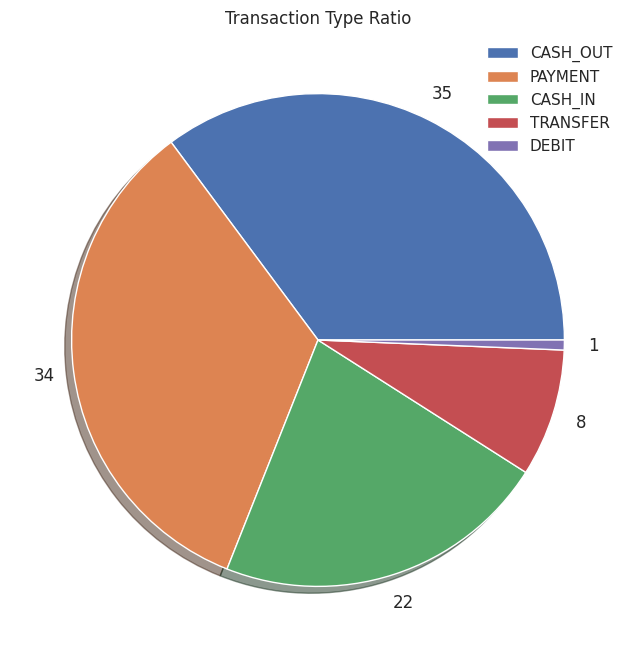

In [ ]:
fig = plt.subplots(figsize = (15, 8))
plt.pie(
    type_df['type'],
    shadow = True,
    labels = None,
    autopct = '%.f',
    pctdistance = 1.12
)
plt.title('Transaction Type Ratio')
plt.legend(type_df.index, loc = 'best')
plt.show()

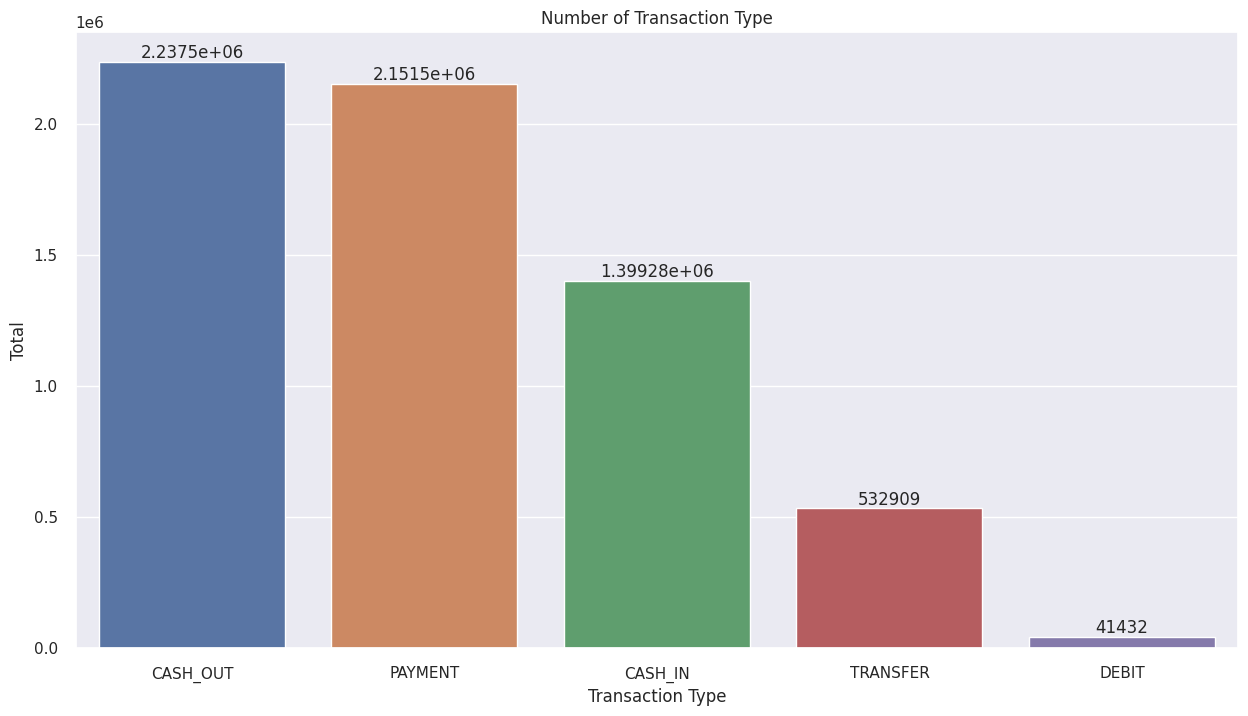

In [ ]:
fig = plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = type_df.index, y = type_df['type'], data = type_df)
plt.title('Number of Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
le_type = preprocessing.LabelEncoder()
le_type.fit(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'])
df['type'] = le_type.fit_transform(df['type'])

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,3,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,3,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,2,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df['type'].unique() # 'PAYMENT': 3, 'TRANSFER': 4, 'CASH_OUT': 1, 'DEBIT': 2, 'CASH_IN:': 0

array([3, 4, 1, 2, 0])

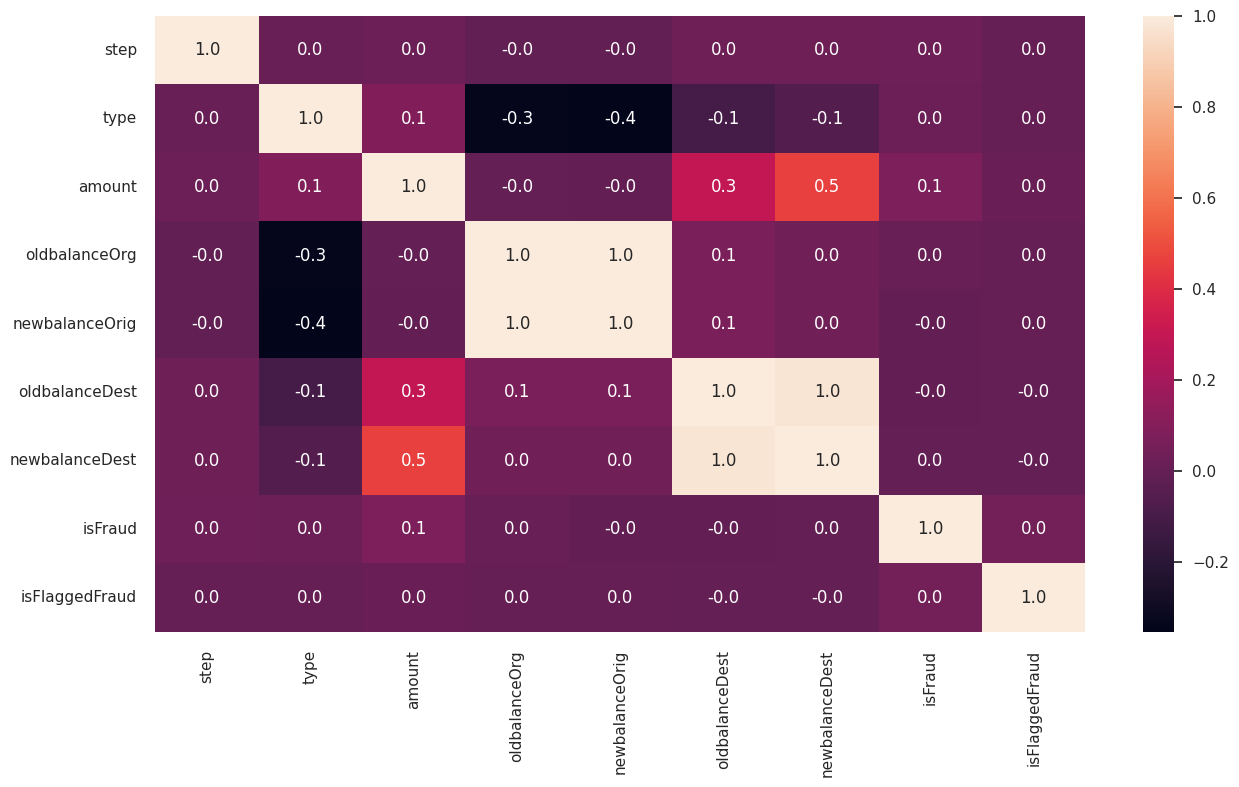

In [ ]:
fig = plt.subplots(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')
plt.show()

In [ ]:
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
x = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
print(y_pred[0:10])
print(y_test[0:10])

[0 0 0 0 0 0 0 0 0 0]
4644207    0
3800666    0
4426240    0
5788765    0
2010701    0
3674513    0
3500205    0
165676     0
4546763    0
5496085    0
Name: isFraud, dtype: int64



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.89      0.87      0.88      2419

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786


Confusion Matrix: 


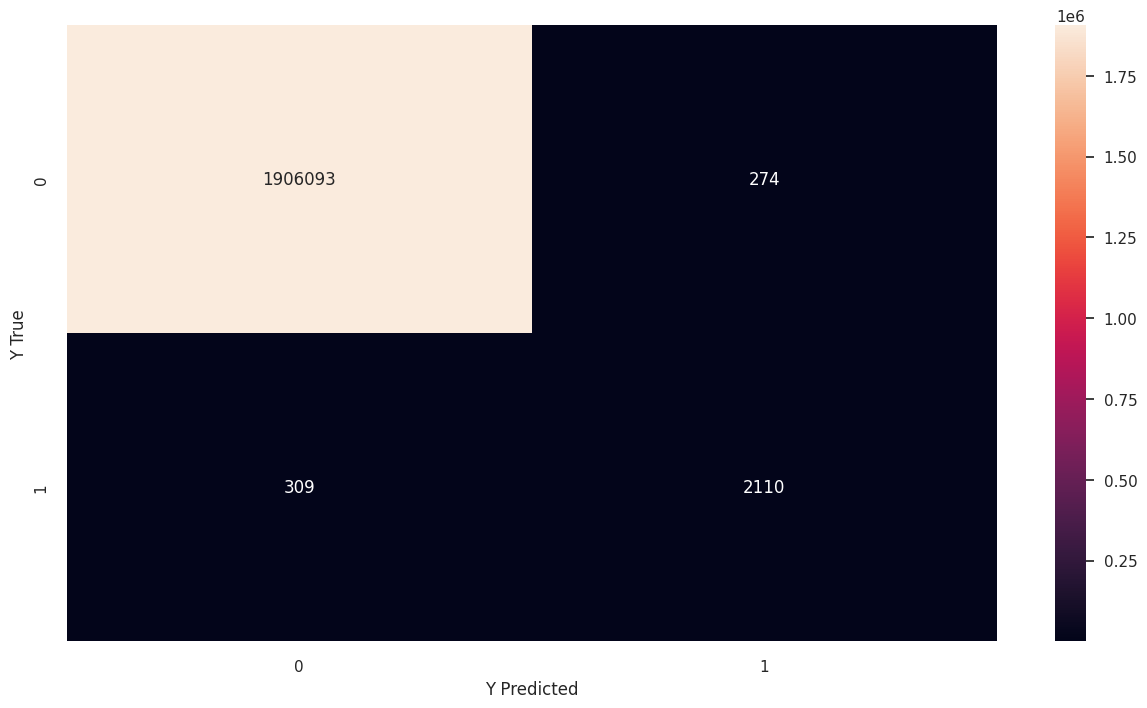


Accuracy Score: 0.9996945702661273


In [ ]:
report = metrics.classification_report(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'\nClassification Report: ')
print(report)

print(f'\nConfusion Matrix: ')
fig = plt.figure(figsize = (15, 8))
sns.heatmap(matrix, annot = True, fmt = 'd')
plt.xlabel('Y Predicted')
plt.ylabel('Y True')
plt.show()

print(f'\nAccuracy Score: {accuracy}')

In [ ]:
def fraud_detectron(transactions):
    for idx, transaction in enumerate(transactions, start = 1):
        prediction = tree.predict([transaction])
        
        if prediction[0] == 0:
            print(f"Transaction #{idx}: No")
        else:
            print(f"Transaction #{idx}: Fraud")

In [ ]:
# 'CASH_IN:': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4
# 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'
transactions = [
    [0, 100, 200, 300], 
    [0, 100, 200, 0],
]
fraud_detectron(transactions)

Transaction #1: No
Transaction #2: Fraud
